# **Iris EDA**

<div>
<img src="https://miro.medium.com/max/4272/0*HWeiO-tBxKeIvpVp" width="450"/>
</div>

**1.1 Giriş**


> İris çiçeği verileri herkesin kullanımına açıktır. Çoğunlukla Veri Bilimi ve Makine Öğrenmesi alanına yeni başlayanlar tarafından en yaygın kullanılan veri kümelerinden biridir. Bu veri seti, California-Irvine Üniversitesi arşivlerinden indirilebilmektedir. Bu veri seti, üç çiçek türünün fiziksel parametrelerinden oluşur - Versicolor, Setosa ve Virginica. Veri setinin içerdiği sayısal parametreler çok değişkenli olmakla birlikte Sepal genişlik, Sepal uzunluk, Petal genişliği ve Petal uzunluğudur. UCI Machine Learning Deposu'ndan alıntı yapıldığında, " model tanıma literatüründe bulunabilecek belki de en iyi bilinen veritabanı " olduğu söyleniyor [1]. Ayrıca Machine Learning Mastery topluluğunu başlatan Jason Brownlee, bunu makine öğreniminin "Merhaba Dünyası" olarak adlandırıyor [2]. Ayrıca bu veri seti, İngiliz istatistikçi ve biyolog Ronald Fisher tarafından 1936 tarihli “Taksonomik problemlerde çoklu ölçümlerin kullanımı” başlıklı makalesinde tanıtıldı. Makine öğrenmesi terminolojisinde sepal uzunluğu, sepal genişliği, petal uzunluğu ve petal genişliği gibi gözlemlenen özellikler bağımsız değişkenler, belirlenecek çiçek sınıfı etiketi ise (Setosa, Virginica ve Versicolor) bağımlı değişken olarak adlandırılır. Bu veri setinin amacı; Sepal uzunluğu, Sepal genişliği, Petal uzunluğu ve Petal genişliği göz önüne alındığında, seçilen numunenin iris çiçeğinin üç türünden biri olan Setosa, Virginica ve Versicolor olarak sınıflandırılmasını sağlamaktır.

**1.2 Problem Tanımı**

Açıklayıcı veri analizi (Exploratory data analysis - EDA), istatistik ve olasılık teorisinden basit kavramları kullanarak verileri analiz etme ve sonuçları kolay anlaşılır bir şekilde görsellikle destekleyen bir formatta sunma sürecidir. Bu çalışmada meşhur Iris çiçeği veri seti kullanılarak açıklayıcı veri analizi gerçekleştirilmiştir.



















<div>
<img src="https://miro.medium.com/max/3000/1*7bnLKsChXq94QjtAiRn40w.png" width="600"/>
</div>


**1.3 Iris Çiçeği Veri Seti Karakteristiği:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

References

   - Fisher, R.A. "The use of multiple measurements in taxonomic problems"
     Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
     Mathematical Statistics" (John Wiley, NY, 1950).
   - Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
     (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   - Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
     Structure and Classification Rule for Recognition in Partially Exposed
     Environments".  IEEE Transactions on Pattern Analysis and Machine
     Intelligence, Vol. PAMI-2, No. 1, 67-71.
   - Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
     on Information Theory, May 1972, 431-433.
   - See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
     conceptual clustering system finds 3 classes in the data.
   - Many, many more ...

## Modüllerin Yüklenmesi

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import *
import warnings
warnings.filterwarnings('ignore')


def mean(k):
    """
    Compute the arithmetic mean.

    Args:
        k ([list]): Input array.

    Returns:
        mean: Calculated mean.
    """
    n = len(k)
    mean = sum(k) / n
    return mean 


def std_dev(k):
    """
    Compute the standard deviation.

    Args:
        k ([list]): Input array.

    Returns:
        std: Calculated standard deviation.
    """
    mean_k = mean(k)
    var  = sum(pow(i-mean_k, 2) for i in k) / len(k)  
    std  = sqrt(var)  
    return std


def covariance(x, y):
    """
    Compute the covariance between samples in x and y.

    Args:
        x ([list]): Input array.
        y ([list]): Input array.

    Returns:
        cov: Calculated covariance.
    """
    mean_x = mean(x)
    mean_y = mean(y)
    cov = sum(((xk-mean_x)*(yk-mean_y)/len(x)) for xk, yk in zip(x, y))
    return cov


def correlation(x, y):
    """
    Compute the correlation between samples in x and y.

    Args:
        x ([list]): Input array.
        y ([list]): Input array.

    Returns:
        corr: Calculated correlation coefficient.
    """
    corr = covariance(x, y) / (std_dev(x)*std_dev(y))
    return corr

## Iris Veri Seti Analizi

###**2.1** Veri setinin yüklenmesi.

In [ ]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['class'] = iris.target
iris_data['class'] = iris_data['class'].replace(to_replace=0, value=iris.target_names[0])
iris_data['class'] = iris_data['class'].replace(to_replace=1, value=iris.target_names[1])
iris_data['class'] = iris_data['class'].replace(to_replace=2, value=iris.target_names[2])
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


###**2.2** Veri setinin: minimum, maksimum, ortalama ve standart sapmalarına bakalım;

Ortalama değerlerin arasında büyük bir fark olmadığını görebiliriz, bu nedenle veri dönüşümü gerekmez. Standart sapma değerleri ise her özniteliğin ortalamasından düşüktür. Bu da verilerin genel olarak ortalamaya yakın bir şekilde konumlandığına işaret eder.

In [ ]:
for feature in iris.feature_names:
    print("\n-", feature, "özniteliği için :")
    min_val = iris_data[feature].min()
    max_val = iris_data[feature].max()
    mean_val = iris_data[feature].mean()
    std_val = iris_data[feature].std()

    print("Minimum:", min_val, "\nMaximum:", max_val)
    print("Mean:", mean_val, "\nStandard Deviation:",std_val)


- sepal length (cm) özniteliği için :
Minimum: 4.3 
Maximum: 7.9
Mean: 5.843333333333335 
Standard Deviation: 0.8280661279778629

- sepal width (cm) özniteliği için :
Minimum: 2.0 
Maximum: 4.4
Mean: 3.057333333333334 
Standard Deviation: 0.435866284936698

- petal length (cm) özniteliği için :
Minimum: 1.0 
Maximum: 6.9
Mean: 3.7580000000000027 
Standard Deviation: 1.7652982332594667

- petal width (cm) özniteliği için :
Minimum: 0.1 
Maximum: 2.5
Mean: 1.199333333333334 
Standard Deviation: 0.7622376689603465


###**2.3** Sınıf dağılımlarını kontrol edelim;

Iris çiçeklerinin üç türünün de her birini içeren 50 numuneden oluşmaktadır. Her sınıf aynı sayıda örneğe sahiptir.

In [ ]:
iris_data.groupby('class').size()

class
setosa        50
versicolor    50
virginica     50
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


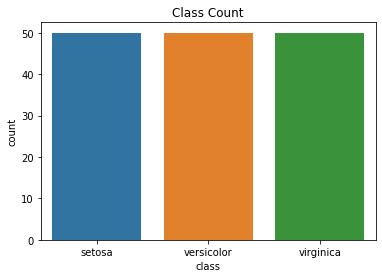

In [ ]:
plt.title('Class Count')
sns.countplot(iris_data['class']);

###**2.4** Veri kümesine ait temel istatistiklere göz atalım;

In [ ]:
iris_data.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


###**2.5** Veri seti üzerinde her öznitelik çifti için korelasyon ve kovaryans değerlerine bakalım;

Ana çıkarım, petal uzunluğu ölçümlerinin oldukça pozitif korelasyona sahipken, sepal uzunluğu olanın korelasyonsuz olmasıdır. Petal uzunluğu özelliklerinin ayrıca sepal uzunluğu ile nispeten yüksek korelasyona sahip olduğunu, ancak sepal genişliği ile olmadığı görülmektedir.

In [ ]:
for feature1 in iris.feature_names:
    for feature2 in iris.feature_names:
        print('Correlation coefficient in {} between {}: {:.3f}'.format(feature1, feature2, correlation(iris_data[feature1].values, iris_data[feature2].values)))
        print('Covariance in {} between {}: {:.3f}\n'.format(feature1, feature2, covariance(iris_data[feature1].values, iris_data[feature2].values)))

Correlation coefficient in sepal length (cm) between sepal length (cm): 1.000
Covariance in sepal length (cm) between sepal length (cm): 0.681

Correlation coefficient in sepal length (cm) between sepal width (cm): -0.118
Covariance in sepal length (cm) between sepal width (cm): -0.042

Correlation coefficient in sepal length (cm) between petal length (cm): 0.872
Covariance in sepal length (cm) between petal length (cm): 1.266

Correlation coefficient in sepal length (cm) between petal width (cm): 0.818
Covariance in sepal length (cm) between petal width (cm): 0.513

Correlation coefficient in sepal width (cm) between sepal length (cm): -0.118
Covariance in sepal width (cm) between sepal length (cm): -0.042

Correlation coefficient in sepal width (cm) between sepal width (cm): 1.000
Covariance in sepal width (cm) between sepal width (cm): 0.189

Correlation coefficient in sepal width (cm) between petal length (cm): -0.428
Covariance in sepal width (cm) between petal length (cm): -0.327

In [ ]:
# Correlation coefficient with Python module
corr_mat = iris_data.corr()
corr_mat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


Aşağıdaki ısı haritasından, petal length ve petal width'in yüksek bir korelasyona sahip olduğunu, petal width ve sepal length'in iyi korelasyona sahip olduğunu ve petal length ile sepal length'in iyi korelasyonlara sahip olduğunu görüyoruz.

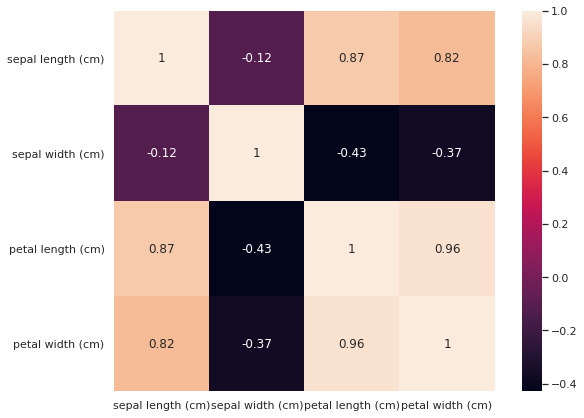

In [ ]:
sns.heatmap(corr_mat, annot = True, square = True)

###**2.6** Özniteliklerin dağılımlarını inceleyelim;

En yüksek sepal genişlik frekansı 2.5 ile 3.0 cm arasındadır ve 40 civarındadır.

En yüksek sepal uzunluk frekansı 4.8 ile 6.5 cm arasındadır ve bu da 35 civarındadır.

En yüksek petal genişliği frekansı 0 ile 0.5 cm arasındadır ve bu da 45 civarındadır.

Petal uzunluğunun en yüksek frekansı, 50 civarında olan 1 ile 1.5 cm arasındadır.

Hem petal uzunluğu hem de petal genişliği için, diğerlerinden daha küçük değerlere sahip bir grup veri noktası vardır ve bu da verilerde farklı gruplar olabileceğini göstermektedir.

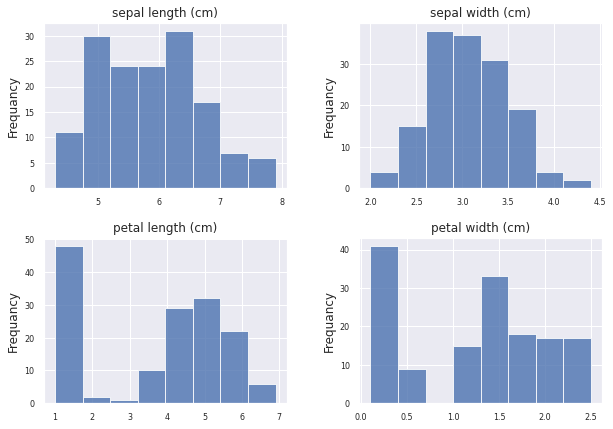

In [ ]:
freq = iris_data.hist(bins=8, xlabelsize = 8, ylabelsize = 8, alpha=0.8)
for col in freq:
    for row in col:
        row.set_ylabel('Frequancy')

Her çiçek türünü, her bir öznitelik için tek tek analiz edelim. Bu grafikler ile bir özniteliğin farklı kategorik verilerde (çiçek türleri) nasıl dağıldığını gözlemleyebilmekteyiz.

Petal genişliği özniteliğinin, versicolor ve virginica türlerinin bazı kısımlarında bir araya geldiğini, ancak setosa türünde kolayca ayrılabildiğini görüyoruz. 

Yine, Petal uzunluğu özniteliği baz alındığında da, diğer iki çiçek türü hala üst üste binerken, setosa türünün ayrılabilir olduğunu görüyoruz. 


Sepal uzunluğu ile devam edelim. Çiçek türlerini yalnızca sepal uzunluğu temelinde ayırmanın oldukça zor olduğunu görüyoruz.

Sepal genişliği durumunda çiçek türlerinin daha yoğun olarak örtüştüğünü görebilmekteyiz.

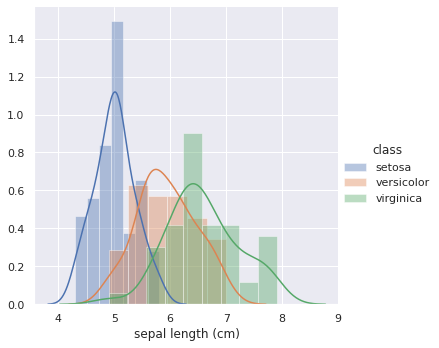

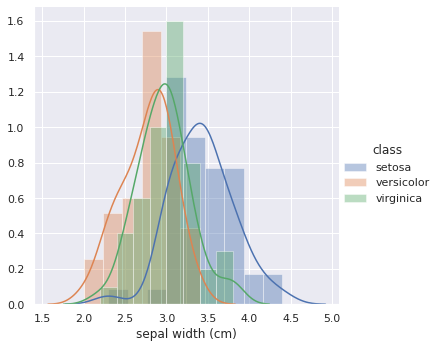

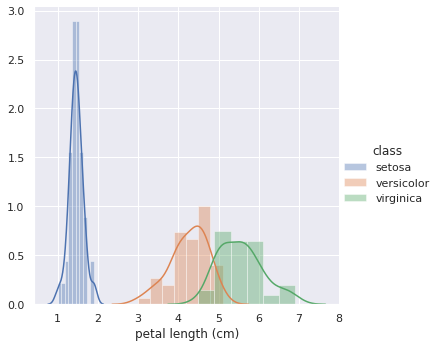

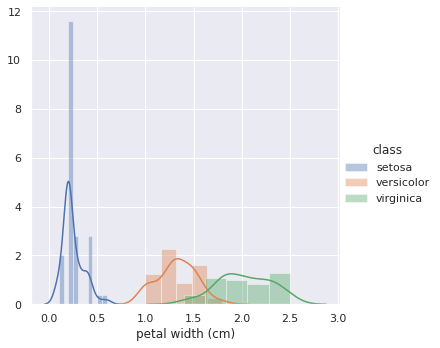

In [ ]:
for feature in iris.feature_names:
    sns.FacetGrid(iris_data,hue="class", height=5).map(sns.distplot, feature).add_legend()

###**2.7** Her bir sınıf için özniteliklerini inceleyelim;

Kutu Grafiği: Kutu grafiği, verilerin dağılımını beş rakamlı bir özete ("minimum", ilk çeyrek (Q1), medyan, üçüncü çeyrek (Q3) ve "maksimum") göre görüntülemenin standart bir yoludur. Aykırı değerleriniz ve değerlerinin neler olduğu hakkında size bilgi verebilir. Ayrıca verilerinizin simetrik olup olmadığını, verilerinizin ne kadar sıkı gruplandırıldığını ve verilerinizin çarpık olup olmadığını ve nasıl çarpık olduğunu da söyleyebilir.

<div>
<img src="https://miro.medium.com/proxy/1*2c21SkzJMf3frPXPAR_gZA.png" width="500"/>
</div>

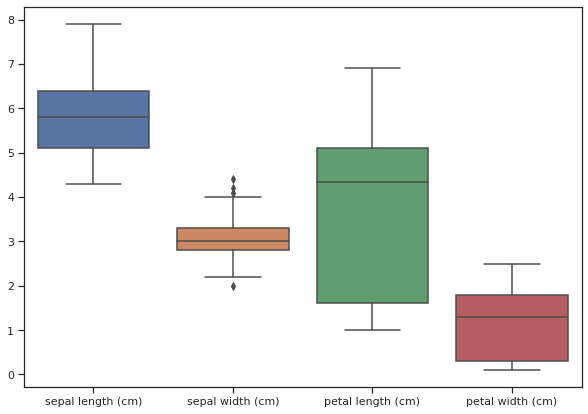

In [ ]:
sns.boxplot(data = iris_data)
sns.set(rc={'figure.figsize':(10, 7)})

Petal özniteliği için oluşturulmuş iki grafik , daha önce gördüğümüz (frekans histogramı analizinde) veri noktaları grubunun setosa sınıfına ait olduğunu gösteriyor. Setosa sınıfının petal ölçümleri için diğer iki türden de daha küçük ve daha az yayılmış olduğu açıktır. Diğer iki tür karşılaştırıldığında, versicolor ortalama olarak virginica'dan daha düşük değerlere sahiptir.

Ayrıca, kutu grafiklerinin setosa'nın genellikle birkaç aykırı değerle daha küçük özniteliklere sahip olduğunu görüyoruz.

Versicolor türlerinin ortalama öznitelikleri vardır.

Virginica türleri, diğerlerine kıyasla en uzun öznitelik genişliklerine ve uzunluklarına sahiptir.

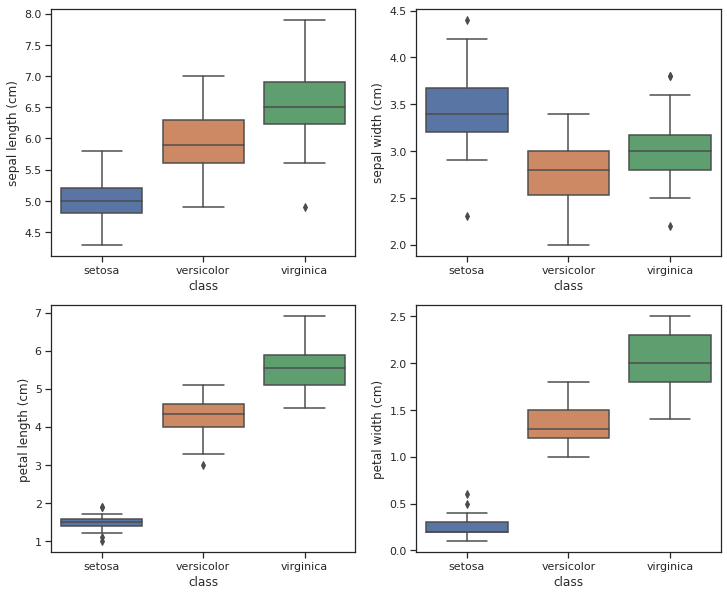

In [ ]:
sns.set(style="ticks") 
i = 1
plt.figure(figsize=(12,10))
for feature in iris.feature_names:
    plt.subplot(2,2,i)
    sns.boxplot(x='class',y=feature, data=iris_data)
    i += 1
plt.show()

Keman Grafiği: Box Plot'a benzer, ancak her tarafta döndürülmüş bir grafikle y eksenindeki yoğunluk tahmini hakkında daha fazla bilgi verir. Yoğunluk yansıtılır ve ters çevrilir ve ortaya çıkan şekil doldurulur ve keman benzeri bir görüntü oluşturulur. Bir keman grafiğinin avantajı, dağıtımdaki bir kutu grafiğinde algılanamayan nüansları gösterebilmesidir. Öte yandan, kutu grafiği, verilerdeki aykırı değerleri daha açık bir şekilde gösterir. Keman Grafikleri, kutu grafiklerinden daha fazla bilgi içerir, daha az popülerdir. Popüler olmadıklarından dolayı, keman olay örgüsüne aşina olmayan birçok okuyucu için anlamlarını kavramak daha zor olabilir.

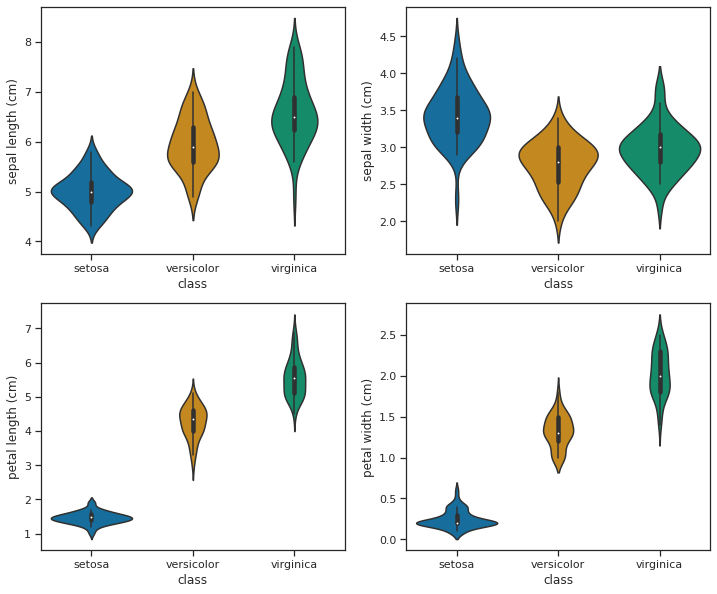

In [ ]:
sns.set(style="ticks") 
i = 1
plt.figure(figsize=(12,10))
for feature in iris.feature_names:
    plt.subplot(2,2,i)
    sns.violinplot(x="class", y=feature, data=iris_data, palette = 'colorblind')
    i += 1
plt.show()

###**2.8** Her öznitelik çifti için sınıf içerisindeki dağılımlarını inceleyelim;


Sepal uzunluğu ve sepal genişliği özniteliklerinin birbiriyle biraz daha az ilişkili olduğunu görebiliriz.

Petal uzunluğu ve petal genişliği yüksek oranda ilişkili göründüğüne dikkat edin. Ek olarak, petal ölçümleri, farklı türleri sepal olanlardan daha iyi ayrıldığı görülmektedir.

Pairplot grafiği, çiçek türleri ve değişkenler arasındaki ilişkiyi temsil eder. 
Setosa türünün sahip olduğu özelliklerin, diğer türlere göre çok daha büyük bir farka sahip olduğunu, petal genişliği ve uzunluğunun daha küçük, sepal genişliğinin yüksek ve petal uzunluğunun az olduğunu görebiliriz. 

Versicolor türü için de benzer türden sonuçlar çıkarılabilir. Versicolor türü çiçekler, ister petal ister sepal olsun, genellikle ortalama yaprak boyutlarına sahiptir. 

Virginica, daha fazla petal genişliğine ve uzunluğuna sahipken, daha küçük sepal genişliğine, ancak daha büyük sepal uzunluğuna sahiptir.

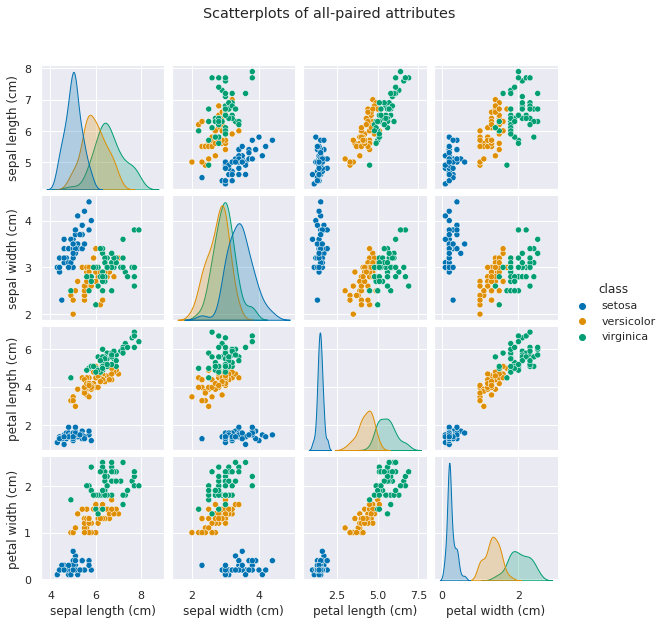

In [ ]:
sns.pairplot(iris_data, hue='class', height = 2, palette = 'colorblind').fig.suptitle("Scatterplots of all-paired attributes", y=1.08)

###**2.9** Veri üzerinde paralel koordinatlar analizi

Bu grafikten, daha önce de gördüğümüz gibi petal ölçümleri, türleri (sınıfları) sepal olanlardan daha iyi ayırabilir.


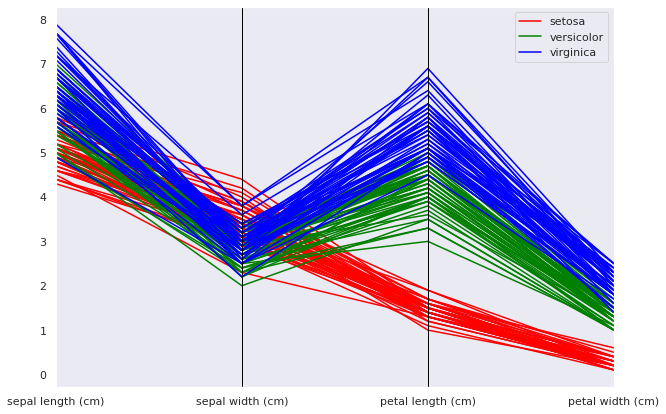

In [ ]:
pd.plotting.parallel_coordinates(iris_data, "class", color = ['red', 'green', 'blue'])

###**2.10** Sonuçlar



Veri kümesi dengelidir, yani her üç tür için eşit kayıtlar mevcuttur.

Dört sayısal veri barındıran sütunumuz varken, analiz etmeyi hedeflediğimiz veri olan sadece bir kategorik sütunumuz vardır (çiçek türleri).

Petal genişliği ile Petal uzunluğu arasında güçlü bir korelasyon mevcuttur.

Setosa türleri, küçük boyutlu olmasından dolayı dolayı en kolay ayırt edilebilen türdür.

Versicolor ve Virginica türleri genellikle karıştırılır ve bazen ayrılması zordur. Ancak genellikle Versicolor türünün boyutları daha ortalama değerdedir. Buna karşın virginica türünün boyutları daha büyüktür.

# **Referanslar**

1.   [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/iris)
2.   [Machine Learning Mastery](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/)
3.   [Images reference](https://analyticsindiamag.com/start-building-first-machine-learning-project-famous-dataset/)
4.   https://towardsdatascience.com/exploring-classifiers-with-python-scikit-learn-iris-dataset-2bcb490d2e1b
5.   https://towardsdatascience.com/eda-of-the-iris-dataset-190f6dfd946d